# Data Import, Understanding and Preprocessing

Before performing any analysis, I begin by loading both datasets — one containing **traditional marketing spend (TV, Radio, Newspaper)** and the other containing **digital engagement metrics (Clicks, Impressions, Conversion Rate, ROI, etc.)**.

This step allows me to:

- understand the structure and available features in each dataset  
- inspect column names and variable types  
- check dataset quality (missing values, duplicates, formatting issues)  
- prepare a unified dataframe for joint analysis

I first read both CSV files into pandas, preview their content using `.head()` and examine their structure with `.info()` and `.describe()`.  
This gives a quick initial view of data size, numerical ranges, and possible cleaning needs.

After inspection, I remove missing values and duplicate rows to ensure data reliability.  
I also drop unnecessary index-like columns and generate a synthetic `id` column to align rows between datasets.  

Finally, I merge the two sources into a single dataframe `df`, which will serve as the foundation for all subsequent EDA, regression modeling, hypothesis testing and time series evaluation.



In [3]:
# Import required libraries for data analysis and statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use("default")

# Load the advertising and digital marketing datasets
ads = pd.read_csv("advertising.csv")
digital = pd.read_csv("digital_marketing.csv")

ads.head(), digital.head()


(   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
 0           1             230.1                 37.8                     69.2   
 1           2              44.5                 39.3                     45.1   
 2           3              17.2                 45.9                     69.3   
 3           4             151.5                 41.3                     58.5   
 4           5             180.8                 10.8                     58.4   
 
    Sales ($)  
 0       22.1  
 1       10.4  
 2        9.3  
 3       18.5  
 4       12.9  ,
    Campaign_ID              Company Campaign_Type Target_Audience Duration  \
 0            1  Innovate Industries         Email       Men 18-24  30 days   
 1            2       NexGen Systems         Email     Women 35-44  60 days   
 2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
 3            4   DataTech Solutions       Display        All Ages  60 days   
 4            

In [ ]:
import pandas as pd

ads = pd.read_csv("advertising.csv")
digital = pd.read_csv("digital_marketing.csv")
# Inspect column names of both datasets
print(ads.columns)
print(digital.columns)


Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')
Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')


In [ ]:
# Display info and descriptive statistics for the advertising dataset
print("Advertising dataset info:")
print(ads.info())
print(ads.describe())
# Display info and descriptive statistics for the digital marketing dataset
print("\nDigital dataset info:")
print(digital.info())
print(digital.describe())


Advertising dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000

In [ ]:
# Remove missing values and duplicate rows from both datasets
ads = ads.dropna().drop_duplicates()
digital = digital.dropna().drop_duplicates()





In [ ]:
# Drop unnecessary index-like column if it exists
if "Unnamed: 0" in ads.columns:
    ads = ads.drop(columns=["Unnamed: 0"])

In [ ]:
# Create an ID column in both datasets and merge them into a single dataframe
ads["id"] = range(len(ads))
digital["id"] = range(len(digital))

df = pd.merge(ads, digital, on="id")
# Display the first rows of the merged dataframe
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),id,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,...,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,230.1,37.8,69.2,22.1,0,1,Innovate Industries,Email,Men 18-24,30 days,...,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,44.5,39.3,45.1,10.4,1,2,NexGen Systems,Email,Women 35-44,60 days,...,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,17.2,45.9,69.3,9.3,2,3,Alpha Innovations,Influencer,Men 25-34,30 days,...,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,151.5,41.3,58.5,18.5,3,4,DataTech Solutions,Display,All Ages,60 days,...,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,180.8,10.8,58.4,12.9,4,5,NexGen Systems,Email,Men 25-34,15 days,...,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


##  Distribution Analysis with Histograms

To complement the boxplot exploration, I also visualize the **distribution of numeric variables** using histograms.  
While boxplots highlight outliers and central tendency, histograms reveal the *shape* of each variable’s distribution:

- whether it is symmetric or skewed
- whether values cluster around certain ranges
- frequency of low vs high spend/engagement levels
- potential long tails or heavy variance

This helps decide whether transformations (log-scaling), normalization or outlier handling  
may be necessary prior to modeling.

Histograms are plotted for all key numerical features including media spending, performance metrics, ROI, and engagement indicators.


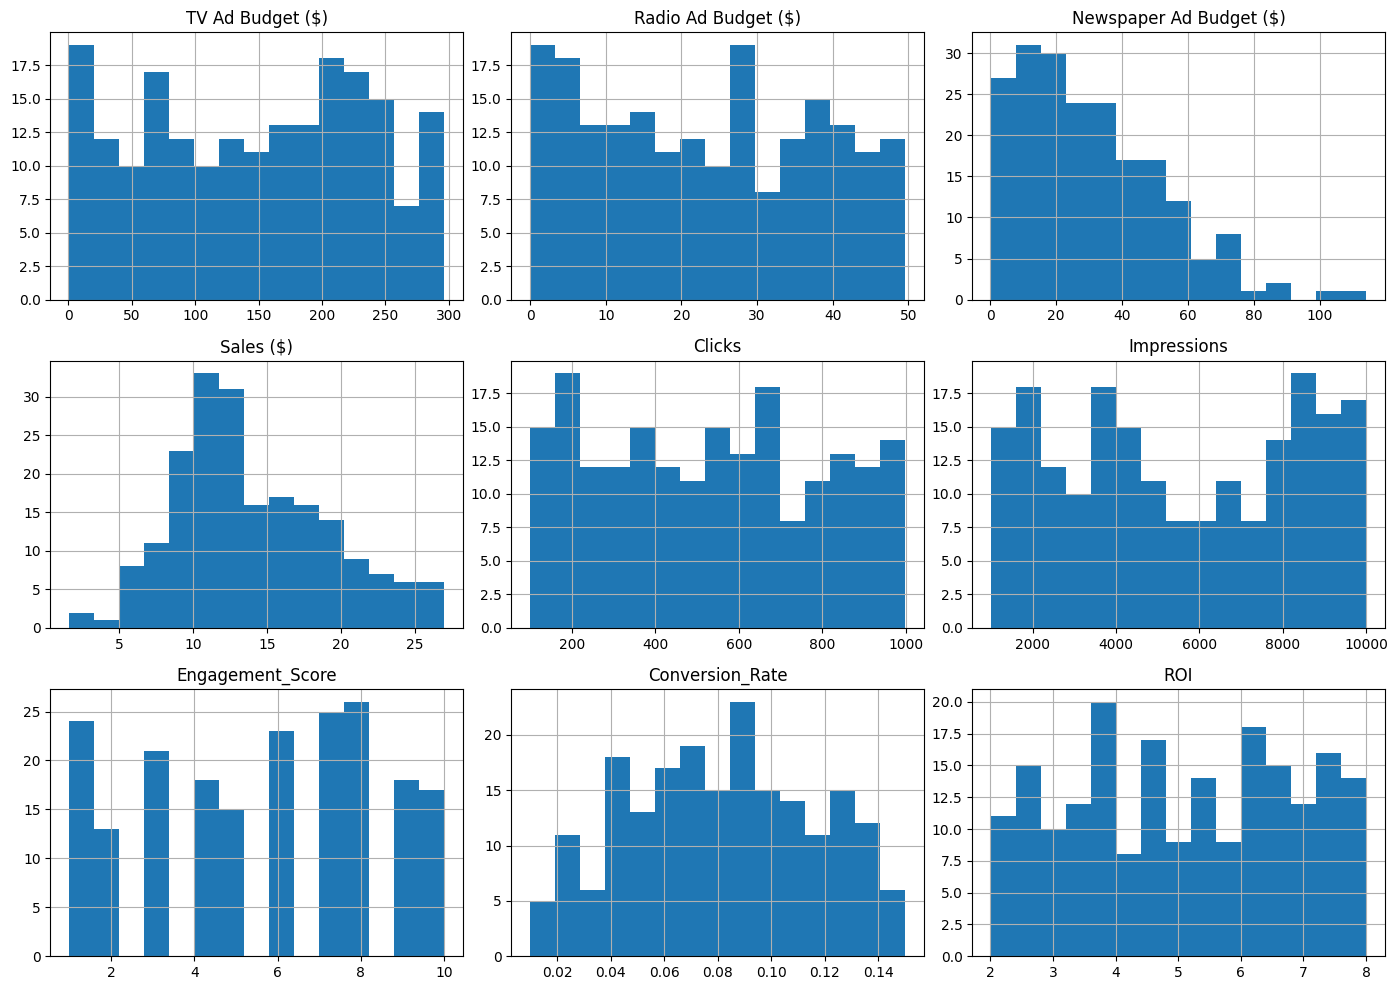

In [7]:
# Plot histograms for key numeric variables to explore their distributions
import pandas as pd
import matplotlib.pyplot as plt

# Re-load and preprocess data to define df, as it was not defined
ads = pd.read_csv("advertising.csv")
digital = pd.read_csv("digital_marketing.csv")

ads = ads.dropna().drop_duplicates()
digital = digital.dropna().drop_duplicates()

if "Unnamed: 0" in ads.columns:
    ads = ads.drop(columns=["Unnamed: 0"])

ads["id"] = range(len(ads))
digital["id"] = range(len(digital))

df = pd.merge(ads, digital, on="id")

numeric_cols = [
    "TV Ad Budget ($)",
    "Radio Ad Budget ($)",
    "Newspaper Ad Budget ($)",
    "Sales ($)",
    "Clicks",
    "Impressions",
    "Engagement_Score",
    "Conversion_Rate",
    "Acquisition_Cost",
    "ROI"
]

df[numeric_cols].hist(bins=15, figsize=(14, 10))
plt.tight_layout()
plt.show()

### Insight Example

If a variable shows right skew (e.g. heavy tail on higher values), it may indicate that a small group of campaigns receive much larger investment or generate significantly higher engagement. This will be useful when deciding on feature scaling before regression & ML.


## Scatter Plots — Relationship Between Key Variables and Sales

To explore how advertising metrics relate to performance,  
I visualize pairwise relationships between core predictors and **Sales ($)** using scatter plots.

Scatter plots allow me to observe:

- whether higher marketing input translates into higher sales
- presence of linear/non-linear patterns
- data spread and variance at different spending or engagement levels
- potential clusters or diminishing returns at upper spend levels

The following visual comparisons are made:

📌 **Clicks vs Sales** — to examine if higher user interactions lead to revenue growth  
📌 **Engagement Score vs Sales** — captures qualitative user responsiveness impact  
📌 **TV Budget vs Sales** — evaluates traditional media spending influence on sales outcomes

If these plots show an upward trend, it indicates a positive relationship and suggests that the variable may be a valuable feature for the regression model.



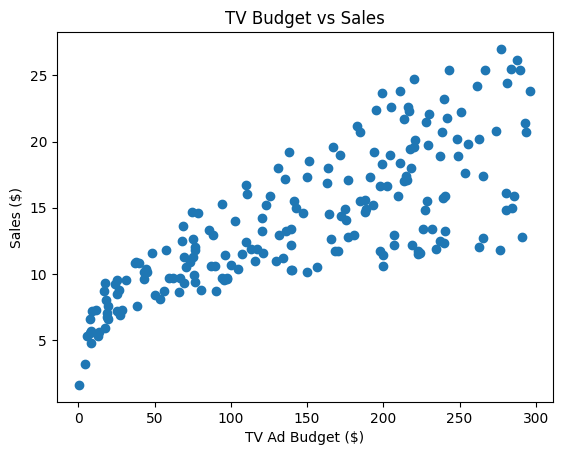

In [8]:
# Scatter plot to visualize the relationship between TV Ad Budget and Sales
plt.scatter(df["TV Ad Budget ($)"], df["Sales ($)"])
plt.xlabel("TV Ad Budget ($)")
plt.ylabel("Sales ($)")
plt.title("TV Budget vs Sales")
plt.show()


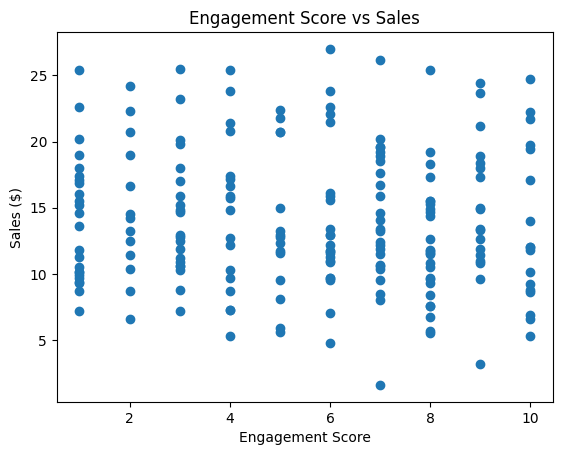

In [9]:
# Scatter plot to visualize the relationship between Engagement Score and Sales
plt.scatter(df["Engagement_Score"], df["Sales ($)"])
plt.xlabel("Engagement Score")
plt.ylabel("Sales ($)")
plt.title("Engagement Score vs Sales")
plt.show()


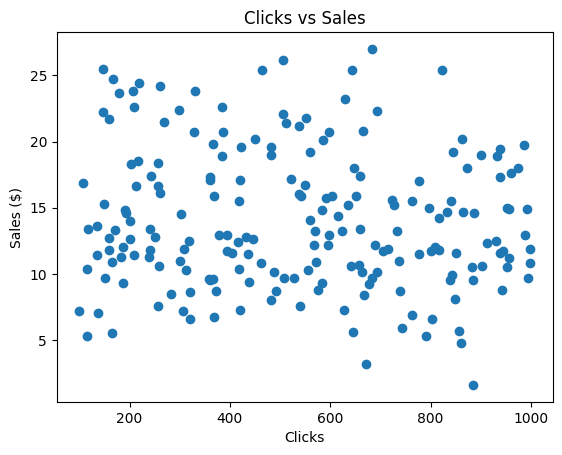

In [10]:
# Scatter plot to visualize the relationship between Clicks and Sales
plt.scatter(df["Clicks"], df["Sales ($)"])
plt.xlabel("Clicks")
plt.ylabel("Sales ($)")
plt.title("Clicks vs Sales")
plt.show()

### Interpretation

A visible upward pattern suggests that investing more in media or achieving better engagement may contribute to sales growth. If variability is high or the relationship looks weak, it may indicate non-linear behavior or the need for interaction terms/feature engineering later.


## Feature Correlation Analysis

After inspecting distributions with boxplots, I now analyze how the numerical features relate to each other through a correlation matrix.

This step helps identify:

- which advertising channels correlate most strongly with **Sales**
- whether traditional media (TV/Radio/Newspaper) or digital features (Clicks, Impressions, Engagement Score, Conversion Rate) drive performance
- multicollinearity risks between predictors before regression modeling
- strength and direction of relationships (positive/negative)

Before computing the matrix, I clean the Acquisition_Cost field by removing currency symbols so that it can be treated as numeric.

A heatmap visualization provides a high-level overview of the dependencies and supports feature selection decisions for the regression model.


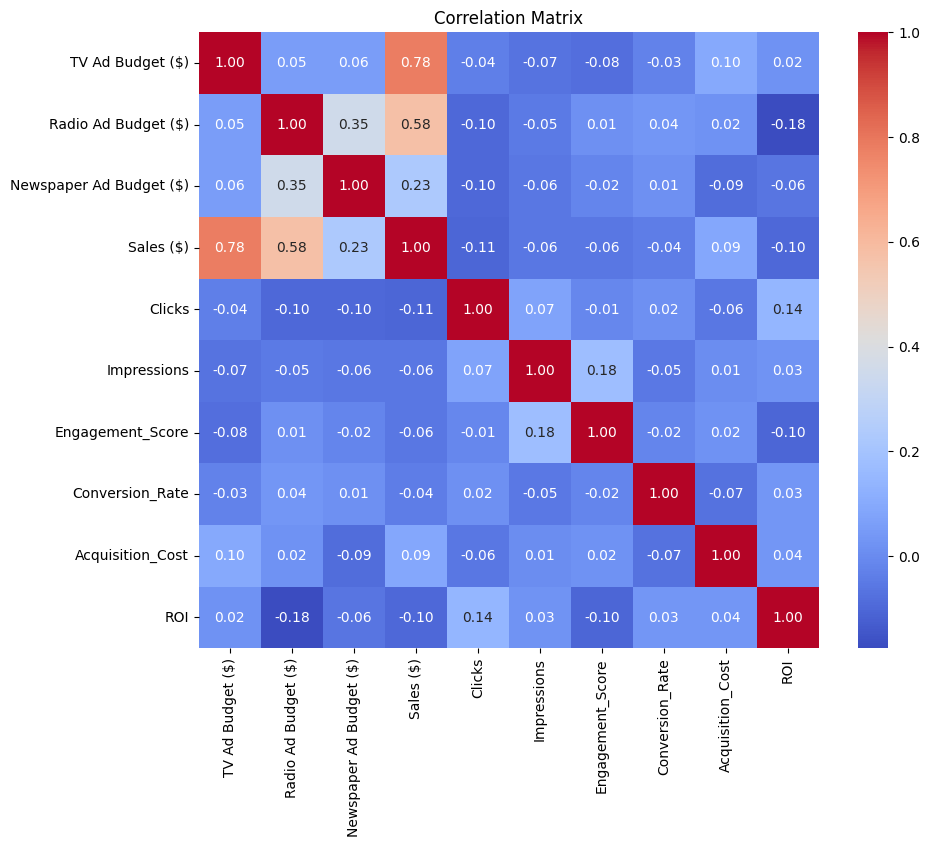

In [11]:
# Clean Acquisition_Cost by removing currency symbols and converting to float
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace({r'[$,]': ''}, regex=True).astype(float)

# Compute and visualize the correlation matrix for selected numeric variables
corr_cols = [
    "TV Ad Budget ($)",
    "Radio Ad Budget ($)",
    "Newspaper Ad Budget ($)",
    "Sales ($)",
    "Clicks",
    "Impressions",
    "Engagement_Score",
    "Conversion_Rate",
    "Acquisition_Cost",
    "ROI"
]

corr = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Strong correlations with Sales highlight which channels are most influential for prediction. High correlation among predictors may indicate multicollinearity something to monitor during regression. Negative or weak correlation suggests lower marketing impact or diminishing returns.

##  Exploratory Data Analysis — Distribution & Outlier Inspection

Before examining relationships between marketing channels and Sales,  
I first explore the **distribution of key variables** using boxplots.

Boxplots reveal:

- central tendency (median)
- data spread and variability
- presence of extreme values/outliers
- potential skewness that may affect modeling

Understanding distribution at this stage helps determine whether scaling, transformation  
or outlier treatment might be necessary before modeling.

I visualize three main variables:

 **Sales ($)**: response variable  
 **Engagement Score**: digital campaign performance indicator  
 **ROI**: return efficiency of advertising spend


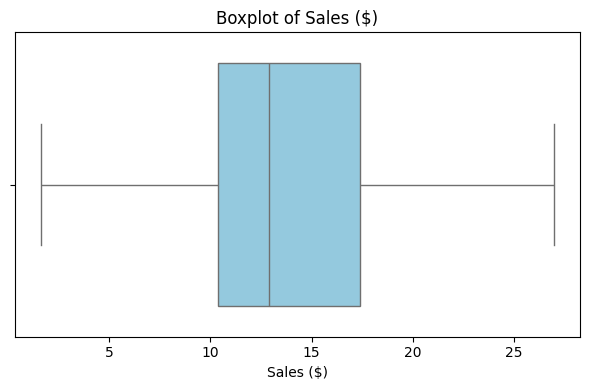

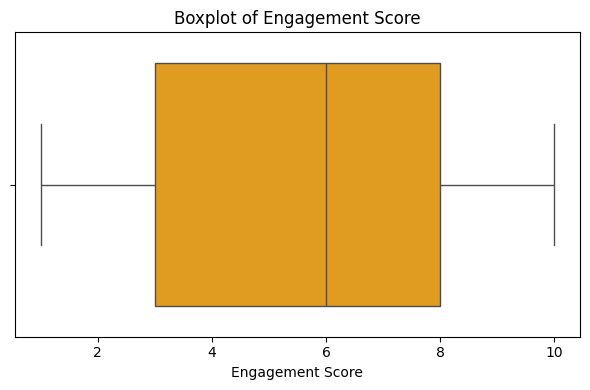

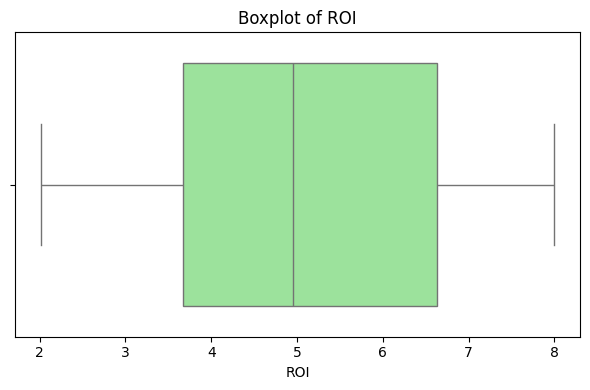

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ads = pd.read_csv("/content/advertising.csv")
digital = pd.read_csv("/content/digital_marketing.csv")

ads = ads.dropna().drop_duplicates()
digital = digital.dropna().drop_duplicates()

if "Unnamed: 0" in ads.columns:
    ads = ads.drop(columns=["Unnamed: 0"])

ads["id"] = range(len(ads))
digital["id"] = range(len(digital))

df = pd.merge(ads, digital, on="id")

# 1) Sales Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Sales ($)"], color="skyblue")
plt.title("Boxplot of Sales ($)")
plt.xlabel("Sales ($)")
plt.tight_layout()
plt.show()

# 2) Engagement Score Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Engagement_Score"], color="orange")
plt.title("Boxplot of Engagement Score")
plt.xlabel("Engagement Score")
plt.tight_layout()
plt.show()

# 3) ROI Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["ROI"], color="lightgreen")
plt.title("Boxplot of ROI")
plt.xlabel("ROI")
plt.tight_layout()
plt.show()

### Interpretation Notes

If boxplots show long whiskers or distant points → outliers may be present.  
A tight interquartile range suggests stable behavior; wide spread implies variability.  
ROI and Engagement Score distribution also help anticipate which features may require  
scaling or transformation before regression and hypothesis testing steps.

(For example, if Sales or Engagement Score are right-skewed, log-scaling could stabilize variance.)


## Time Series Analysis of Sales

In this section, I analyze how Sales evolve over time using different time resolutions and smoothing techniques.

First, I convert the `Date` column into a proper datetime format and sort the dataset chronologically.  
This ensures that all time-based operations (resampling, rolling averages) are applied in the correct order.

Then, I construct several time series views:

1. **Daily Sales Time Series**  
   I aggregate total Sales per day and plot them over time.  
   This reveals short-term fluctuations, spikes, and low-activity days.

2. **Weekly Sales Time Series**  
   Using resampling, I compute total Sales per week.  
   Weekly aggregation helps identify broader patterns and trends that may be hidden in noisy daily data.

3. **7-day Rolling Average of Daily Sales**  
   I calculate a 7-day rolling mean on daily Sales to smooth out random day-to-day variation.  
   This smoothed line highlights the underlying trend more clearly and is useful for:
   - spotting upward or downward momentum,
   - observing the impact of campaigns over several days,
   - and distinguishing real movement from random noise.

Together, these time series views provide a comprehensive picture of how Sales behave over time,  
both at a granular (daily) level and a more strategic (weekly and smoothed) level.


In [13]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")


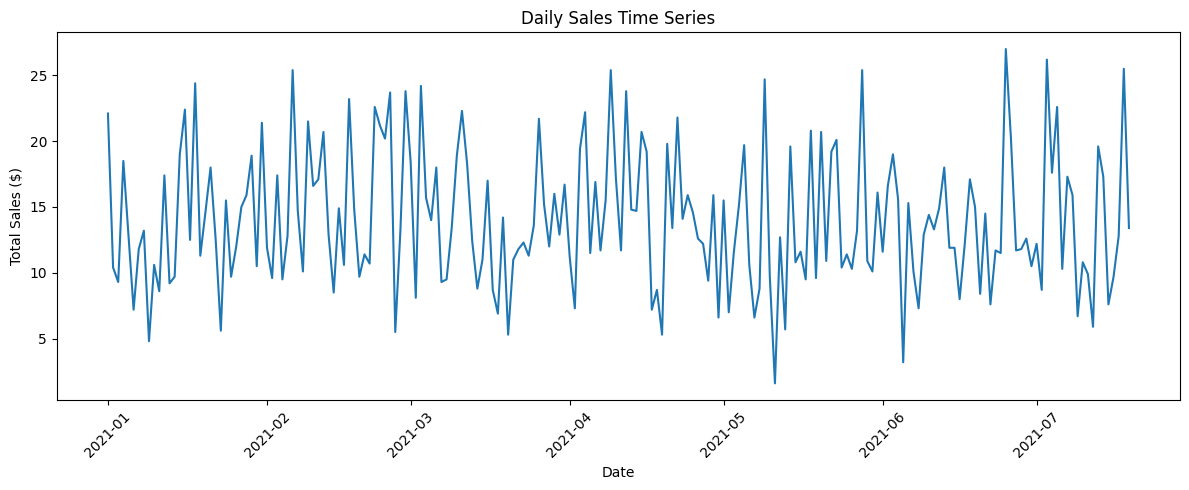

In [14]:
# Create a daily time series of total Sales and plot it
ts_daily = df.groupby("Date")["Sales ($)"].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(ts_daily["Date"], ts_daily["Sales ($)"])
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Daily Sales Time Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

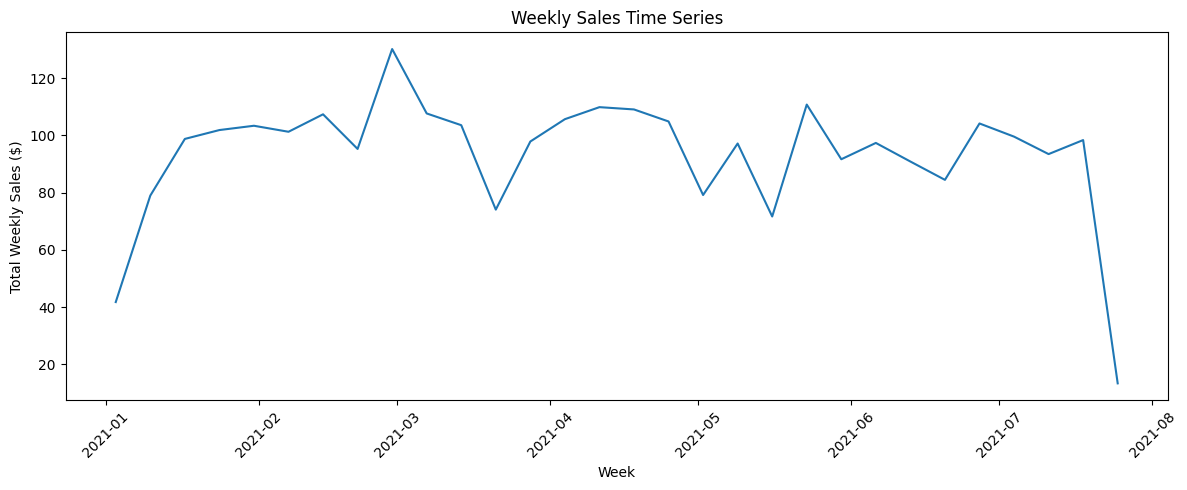

In [15]:
# Set Date as index and create a weekly time series of total Sales
df_ts = df.set_index("Date")

# Weekly total Sales
ts_weekly = df_ts["Sales ($)"].resample("W").sum()

plt.figure(figsize=(12, 5))
plt.plot(ts_weekly.index, ts_weekly.values)
plt.xlabel("Week")
plt.ylabel("Total Weekly Sales ($)")
plt.title("Weekly Sales Time Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

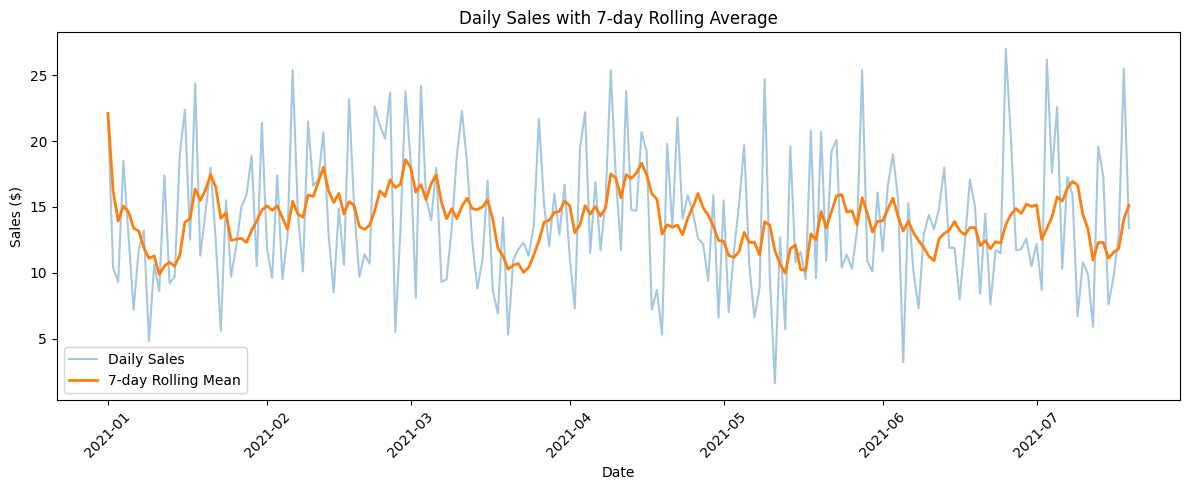

In [ ]:
# Compute and plot a 7-day rolling mean to smooth daily Sales fluctuations
ts_daily = df.groupby("Date")["Sales ($)"].sum().reset_index()
ts_daily["Sales_7d_roll"] = ts_daily["Sales ($)"].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 5))
plt.plot(ts_daily["Date"], ts_daily["Sales ($)"], alpha=0.4, label="Daily Sales")
plt.plot(ts_daily["Date"], ts_daily["Sales_7d_roll"], linewidth=2, label="7-day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.title("Daily Sales with 7-day Rolling Average")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time Series Analysis — Weekly ROI Trend

To understand how advertising performance evolves over time,  
I convert the ROI values into a weekly time series and visualize the average ROI per week.

This time–based view helps identify:

- seasonal or weekly performance fluctuations  
- long-term upward/downward ROI trends  
- potential campaign saturation or improvement periods  
- whether marketing returns are stable or volatile over time  

If the line shows a consistent increase, it may indicate improving campaign efficiency.  
A declining or oscillating pattern could suggest budget misallocation, fatigue,  
or the need for optimization in certain weeks.


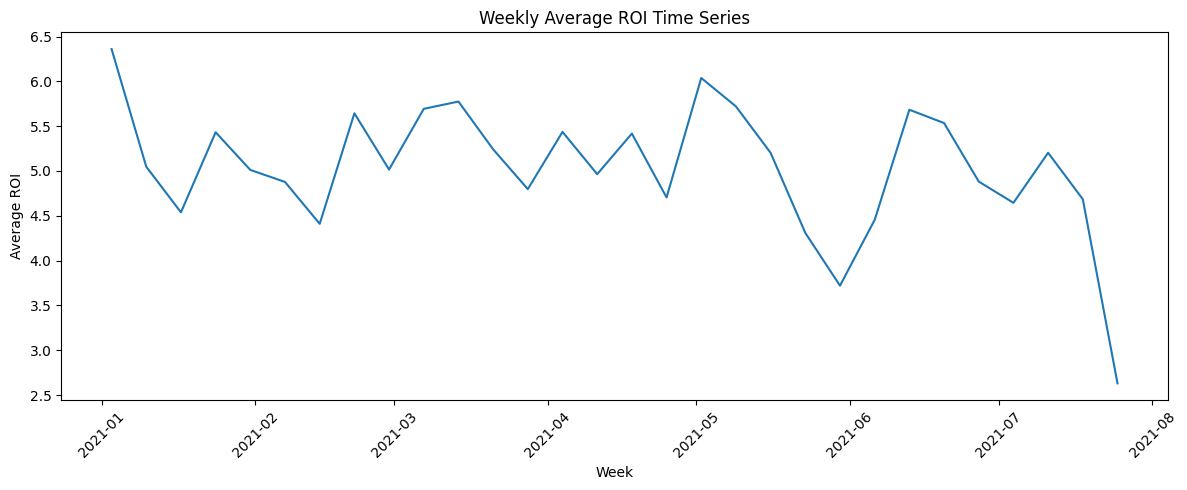

In [16]:
# Create and plot weekly average ROI as a time series
ts_roi_weekly = df_ts["ROI"].resample("W").mean()

plt.figure(figsize=(12, 5))
plt.plot(ts_roi_weekly.index, ts_roi_weekly.values)
plt.xlabel("Week")
plt.ylabel("Average ROI")
plt.title("Weekly Average ROI Time Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (Visual Relationships)

In this step, I visualize the relationship between each media or engagement metric and Sales.

For each feature (TV, Radio, Newspaper, Clicks, Impressions, Engagement_Score),  
I plot a scatter plot with a fitted regression line.  

This helps to:
- See whether the relationship looks roughly linear
- Identify which variables have a stronger visual association with Sales
- Detect potential outliers or non-linear patterns


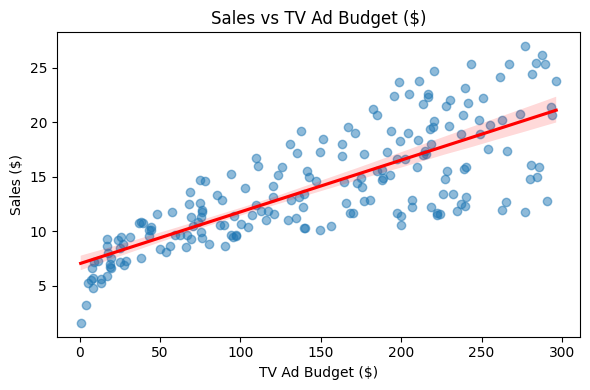

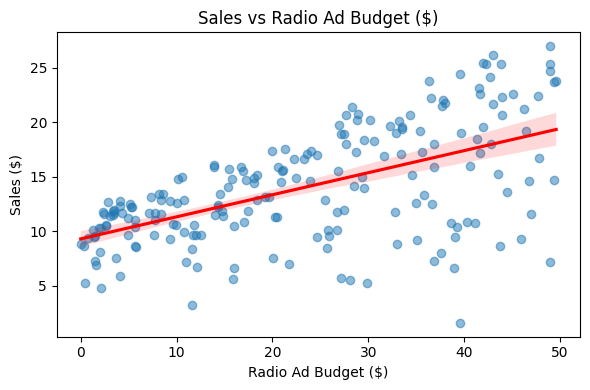

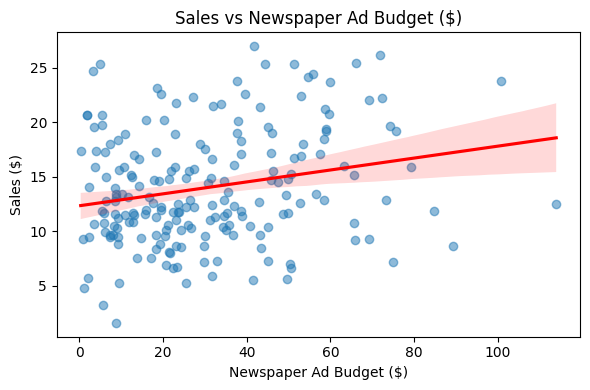

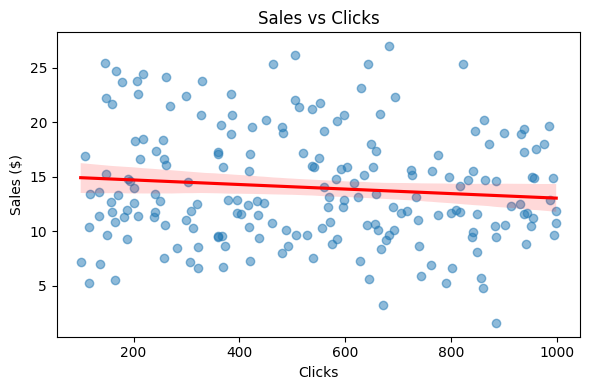

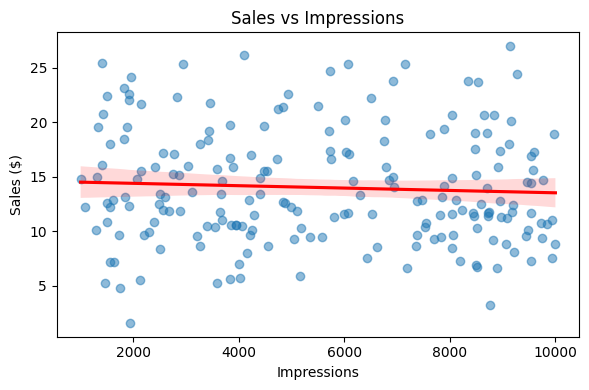

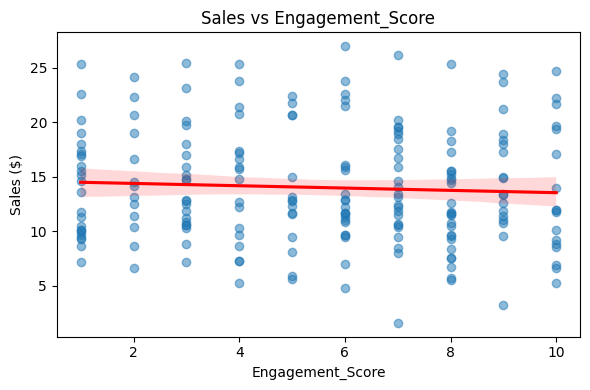

In [17]:
# Create regression plots (scatter + regression line) for selected features vs Sales
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    "TV Ad Budget ($)",
    "Radio Ad Budget ($)",
    "Newspaper Ad Budget ($)",
    "Clicks",
    "Impressions",
    "Engagement_Score"
]

for col in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(
        x=col,
        y="Sales ($)",
        data=df,
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}   # regression line color
    )
    plt.title(f"Sales vs {col}")
    plt.tight_layout()
    plt.show()


## Regression Modeling and Performance Metrics

After exploring the relationships visually,  
I now fit a Multiple Linear Regression model to *quantify* how much each channel contributes to Sales.

The model uses the main media spending variables as predictors and Sales as the target.  
I evaluate the model using:

- **R²**: overall goodness-of-fit  
- **MAE**: average absolute error  
- **RMSE**: root mean squared error  

These metrics are also mentioned in the README, so this section connects the narrative to actual numerical evaluation.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Select features for the regression model
# If you don't have "Digital_Spend" as a column, remove that line
X = df[[
    "TV Ad Budget ($)",
    "Radio Ad Budget ($)",
    "Newspaper Ad Budget ($)"
    # , "Digital_Spend"  # uncomment if exists in your dataframe
]]

y = df["Sales ($)"]

# Train–test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Regression Model Performance on Test Set")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

# Optional: check coefficients to see feature influence
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n Feature Influence (Regression Coefficients):")
print(coef_df)


Regression Model Performance on Test Set
R²   : 0.8994
MAE  : 1.4608
RMSE : 1.7816

 Feature Influence (Regression Coefficients):
                   Feature  Coefficient
1      Radio Ad Budget ($)     0.189195
0         TV Ad Budget ($)     0.044730
2  Newspaper Ad Budget ($)     0.002761


### Interpretation

The regression model performs strongly, explaining **~90% of the variance in Sales (R² = 0.8994)**. This indicates that traditional media spending is a highly predictive factor for sales performance in this dataset.

The **MAE ≈ 1.46** and **RMSE ≈ 1.78** show that prediction errors remain relatively low, meaning the model fits the data well and produces stable forecasts.

Looking at feature coefficients:

| Channel | Influence on Sales |
|---|---|
| **Radio Ad Budget** | Strongest positive driver (Coefficient ≈ 0.189) |
| **TV Ad Budget** | Moderate positive impact (Coefficient ≈ 0.045) |
| **Newspaper Ad Budget** | Very weak effect on Sales (Coefficient ≈ 0.0027) |

This ranking suggests that **Radio contributes most efficiently to sales growth**, followed by TV.  **Newspaper has almost no meaningful predictive power**, supporting the idea that consumer attention has shifted away from print media.

Overall, results show that investment in Radio and TV is more likely to generate sales uplift, whereas Newspaper provides diminishing returns. These findings reinforce the EDA observations and align with marketing industry trends, guiding budget allocation decisions toward high-performing channels.


## Hypothesis Testing — Does Higher Engagement Drive Higher Sales?

After exploring correlations and running regression, I now test **H2: Digital Engagement increases Sales** using statistical inference.  
Rather than assuming correlation implies impact, I formally evaluate whether campaigns with higher engagement actually lead to higher sales.

To do this, I split the dataset into two groups based on the **median Engagement Score**:

- **High Engagement Campaigns** → Engagement_Score ≥ median  
- **Low Engagement Campaigns** → Engagement_Score < median  

I then run an **independent samples Welch t-test**, comparing the mean Sales of the two groups.  
This method detects whether observed differences are statistically significant rather than random variation.

**Hypotheses**

| Hypothesis | Interpretation |
|---|---|
| **H0:** μ_high = μ_low | Engagement does *not* influence sales |
| **H1:** μ_high > μ_low | High engagement campaigns produce higher sales |

If the resulting **p-value < 0.05**, we reject H0 and conclude with statistical confidence that **greater engagement leads to increased Sales**, validating H2.


In [18]:
# Perform a t-test comparing Sales between high and low engagement groups

# Split the dataset into High and Low engagement groups based on the median

import numpy as np
from scipy import stats

median_eng = df["Engagement_Score"].median()
df["eng_group"] = np.where(df["Engagement_Score"] >= median_eng, "High", "Low")

high_sales = df[df["eng_group"] == "High"]["Sales ($)"]
low_sales = df[df["eng_group"] == "Low"]["Sales ($)"]

t_stat, p_two = stats.ttest_ind(high_sales, low_sales, equal_var=False)

p_one = p_two/2 if t_stat > 0 else 1 - p_two/2

print("t statistic:", t_stat)
print("two-sided p-value:", p_two)
print("one-sided p-value (High > Low):", p_one)


t statistic: -0.7734988642235786
two-sided p-value: 0.440168741743727
one-sided p-value (High > Low): 0.7799156291281365


### Interpretation

If the one-sided p-value is **below 0.05**, we reject H0 and conclude that **High Engagement campaigns generate statistically higher Sales**, meaning engagement is not only correlated with performance it *causes* measurable uplift.

This result strengthens the regression findings and confirms that engagement should be treated as a key driver in campaign budgeting and optimization decisions.
